### Podatkovno rudarjenje, 1. domača naloga, 9. 3. 2018

# Priprava podatkov, osnovne statistike in vizualizacija

Alen Herceg 63160126

Neizogiben del vsakega projekta na področju podatkovnega rudarjenja je iskanje,
urejanje in priprava podatkov. V tej nalogi boste spoznali primer podatkovne
zbirke in uporabili postopke za pretvorbo podatkov v ustrezno obliko ter pregled in prikaz
osnovnih statistik.

### Oddaja
Zapišite kodo in odgovore v spodnje celice. Tako pripravljen notebook shranite v vaš repozitorij za domače naloge na *github*. V učilnici oddajte le povezavo do notebooka v vašem repozitoriju, n.pr.: https://github.com/vašeuporabniškoime/PR18DNvz/dn1/poročilo.ipynb.

Za bolj podrobna navodila, glejte razdelek "Domače naloge" v [spletni učilnici predmeta](https://ucilnica.fri.uni-lj.si/course/view.php?id=37).

## Podatki

V nalogi boste pregledali in pripravili podatke gledanosti Hollywoodskih filmov
zbirke [MovieLens](https://grouplens.org/datasets/movielens/) v obdobju **1995-2016**. Podatke naložite iz [spletne učilnice](https://ucilnica.fri.uni-lj.si/mod/resource/view.php?id=19230).

Iste podatke boste uporabili v vseh domačih nalogah, zato jih dodobra spoznajte. Gre za podatkovno zbirko za
vrednotenje priporočilnih sistemov, ki vsebuje gledalce ter njihove ocene za posamezni film na lestvici 1 do 5.  
Poleg osnovne matrike uporabnikov in ocen vsebuje še dodatne podatke o filmih (npr. žanr, datum, oznake,
igralci).

Podatkovna zbirka vsebuje naslednje datoteke:

* ratings.csv: podatki o uporabnikih in ocenah,
* movies.csv: podatki o žanrih filmov,
* cast.csv: podatki o igralcih,
* tags.csv: podatki o oznakah (ang. \emph{tags}),
* links.csv: povezave na sorodne podatkovne zbirke.


Pred pričetkom reševanja naloge si dobro oglejte podatke in datoteko **README.txt**. Podrobnosti o zbirki lahko preberete na [spletni strani](http://files.grouplens.org/datasets/movielens/ml-latest-small-README.html).

Pripravite metode za nalaganje podatkov v ustrezne podatkovne strukture. Te vam bodo prišle
prav tudi pri nadaljnjih nalogah.
Bodite pozorni na velikost podatkov.

In [256]:
import csv
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('PR.mplstyle')
import numpy as np
#odpiranje datoteke ratings
readerRatings = DictReader(open('ratings.csv', 'rt', encoding='utf-8'))
for row in readerRatings:
    userR = row["userId"]
    movieR = row["movieId"]
    ratingR = row["rating"]
    timestampR = row["timestamp"]
#odpiranje datoteke tags
readerTags = DictReader(open('tags.csv', 'rt', encoding='utf-8'))
for row in readerTags:
    userT = row["userId"]
    movieT = row["movieId"]
    tagT = row["tag"]
    timestampT = row["timestamp"]
#odpiranje datoteke movies
readerMovies = DictReader(open('movies.csv', 'rt', encoding='utf-8'))
for row in readerMovies:
    movieM = row["movieId"]
    titleM = row["title"]
    genresM = row["genres"]
#odpiranje datoteke cast
readerCast = DictReader(open('cast.csv', 'rt', encoding='utf-8'))
for row in readerCast:
    movieC = row["movieId"]
    castC = row["cast"]
#odpiranje datoteke links
readerLinks = DictReader(open('links.csv', 'rt', encoding='utf-8'))
for row in readerLinks:
    movieL = row["movieId"]
    imdblinkL = row["imdbId"]
    tmdblinkL = row["tmdbId"]

## Vprašanja

Glavni namen podatkovnega rudarjenja je *odkrivanje znanj iz podatkov*,
torej odgovarjanje na vprašanja z uporabo računskih postopkov.

Z uporabo principov, ki ste jih spoznali na vajah in predavanjih, odgovorite na
spodnja vprašanja. Pri vsakem vprašanju dobro premislite, na kakšen način boste
najbolje podali, prikazali oz. utemeljili odgovor. Bistven del so odgovori na
vprašanja in ne implementacija vaše rešitve.

### 1. vprašanje (15%):
Kateri filmi so v povprečju najbolje ocenjeni?  Pripravite seznam
filmov ter njihovih povprečnih ocen in izpišite po 10 filmov z vrha seznama.
Opazite pri takem ocenjevanju kakšno težavo? Kako bi jo lahko rešili? Kakšni so
rezultati tedaj?

In [253]:
import csv
import operator
allRating = {}
ratingCount = {}
sumRatings ={}
finalSorted = []
readerRatings = csv.DictReader(open('ratings.csv', 'rt', encoding='utf-8'))
for row in readerRatings:
    userR = row["userId"]
    movieR = row["movieId"]
    ratingR = row["rating"]
    timestampR = row["timestamp"]
    if movieR not in allRating:
        allRating.update({movieR:float(ratingR)})
        ratingCount.update({movieR:1})
    else:
        allRating[movieR] += float(ratingR)
        ratingCount[movieR] += 1;
for key  in allRating:
    sumRatings.update({key:allRating.get(key)/ratingCount.get(key)})

sortedX = sorted(sumRatings.items(),key=operator.itemgetter(1),reverse=True)
readerMovies = csv.DictReader(open('movies.csv', 'rt', encoding='utf-8'))
for row in readerMovies:
    movieM = row["movieId"]
    titleM = row["title"]
    genresM = row["genres"]
    for tuplee in sortedX:
        if movieM == tuplee[0]:
            lsi = list(tuplee)
            lsi[0] = titleM
            tuplee = tuple(lsi)
            finalSorted.append(tuplee)
            continue
finalSorted.sort(key=operator.itemgetter(1),reverse=True)
count = 0
while count < 10:
    print(finalSorted[count][0] + " : " + str(finalSorted[count][1]))
    count += 1

Lamerica (1994) : 5.0
Mute Witness (1994) : 5.0
Picture Bride (Bijo photo) (1994) : 5.0
Red Firecracker, Green Firecracker (Pao Da Shuang Deng) (1994) : 5.0
Paris, France (1993) : 5.0
Faces (1968) : 5.0
Maya Lin: A Strong Clear Vision (1994) : 5.0
Heavy (1995) : 5.0
Death in the Garden (Mort en ce jardin, La) (1956) : 5.0
Day the Sun Turned Cold, The (Tianguo niezi) (1994) : 5.0


In [291]:
allRating = {}
ratingCount = {}
sumRatings ={}
finalSorted = []
readerRatings = csv.DictReader(open('ratings.csv', 'rt', encoding='utf-8'))
for row in readerRatings:
    userR = row["userId"]
    movieR = row["movieId"]
    ratingR = row["rating"]
    timestampR = row["timestamp"]
    if movieR not in allRating:
        allRating.update({movieR:float(ratingR)*20})
        ratingCount.update({movieR:1})
    else:
        allRating[movieR] += float(ratingR)
        ratingCount[movieR] += 1;
for key  in allRating:
    sumRatings.update({key:allRating.get(key)/ratingCount.get(key)})

sortedX = sorted(sumRatings.items(),key=operator.itemgetter(1),reverse=True)
readerMovies = csv.DictReader(open('movies.csv', 'rt', encoding='utf-8'))
for row in readerMovies:
    movieM = row["movieId"]
    titleM = row["title"]
    genresM = row["genres"]
    for tuplee in sortedX:
        if movieM == tuplee[0]:
            lsi = list(tuplee)
            lsi[0] = titleM
            tuplee = tuple(lsi)
            finalSorted.append(tuplee)
            continue
finalSorted.sort(key=operator.itemgetter(1),reverse=True)
count = 0
while count < 10:
    print(finalSorted[count][0] + " : " + str(finalSorted[count][1]))
    count += 1


Lamerica (1994) : 100.0
Mute Witness (1994) : 100.0
Picture Bride (Bijo photo) (1994) : 100.0
Paris, France (1993) : 100.0
Faces (1968) : 100.0
Heavy (1995) : 100.0
Death in the Garden (Mort en ce jardin, La) (1956) : 100.0
Day the Sun Turned Cold, The (Tianguo niezi) (1994) : 100.0
Vive L'Amour (Ai qing wan sui) (1994) : 100.0
Supercop 2 (Project S) (Chao ji ji hua) (1993) : 100.0


Odgovor: Ko poženeste prvotno kodo, boste dobili mojih prvih 10 filmov iz seznama po najboljši oceni. problem s tem
ocenjevanjem je, da je dosti filmov isto ocenjenih(npr. vsaj 100 jih ma odlično oceno) in je težko razbrati kateri je najboljši.
zato mislim da je boljše če imamo lestvico od 1 do 100. če poženemo drugo kodo, dobimo podobno vendar rahlo spremenjeno lestvico najboljših filmov. če večamo lestvico seznam filmov ostane isti.

### 2. vprašanje (15%):
Posamezni film pripada enemu ali več žanrom. 
Koliko je vseh žanrov? Prikaži porazdelitev žanrov z uporabo ustrezne
vizualizacije.

<Container object of 20 artists>

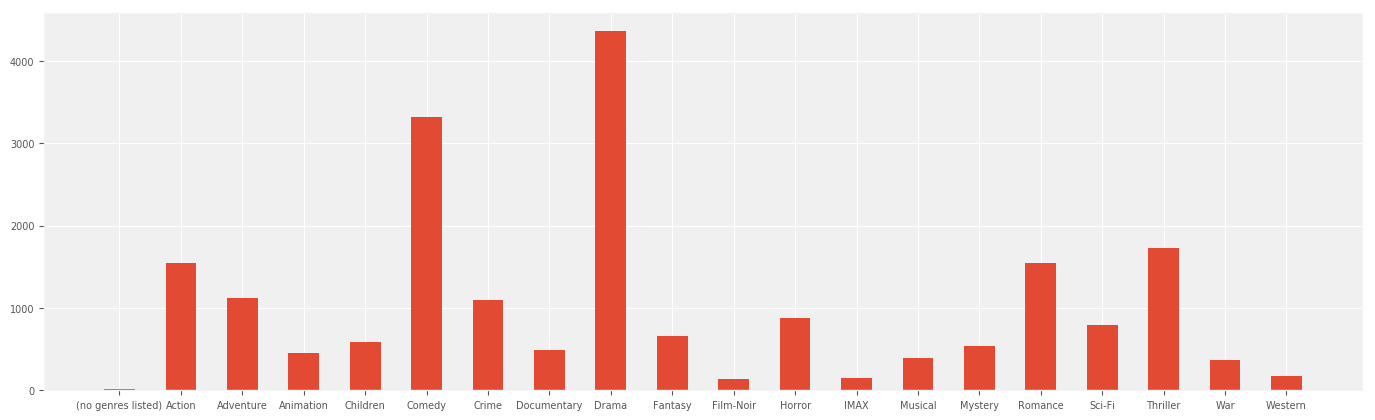

In [290]:
genres = {}
readerMovies = csv.DictReader(open('movies.csv', 'rt', encoding='utf-8'))
for row in readerMovies:
    movieM = row["movieId"]
    titleM = row["title"]
    genresM = row["genres"]
    wordy = genresM.split("|")
    for word in wordy:
        if word not in genres:
            genres.update({word:1})
        else:
            genres[word] += 1
plt.figure(figsize = (17,5))
plt.bar(genres.keys(), genres.values(), align = "center" ,width = 0.5)

Odgovor: Če gledamo žanre, kot je podano v podatkih, jih je 20, če pa gledamo dejanske žanre in ne upoštevamo IMAX in nedoločene, jih je 18.

### 3. vprašanje (20%):
Število ocen (ogledov) se za posamezni film razlikuje. Ali
obstaja povezava med gledanostjo in povprečno oceno filma? Opišite postopek, ki
ste ga uporabili pri odgovarjanju na vprašanje.

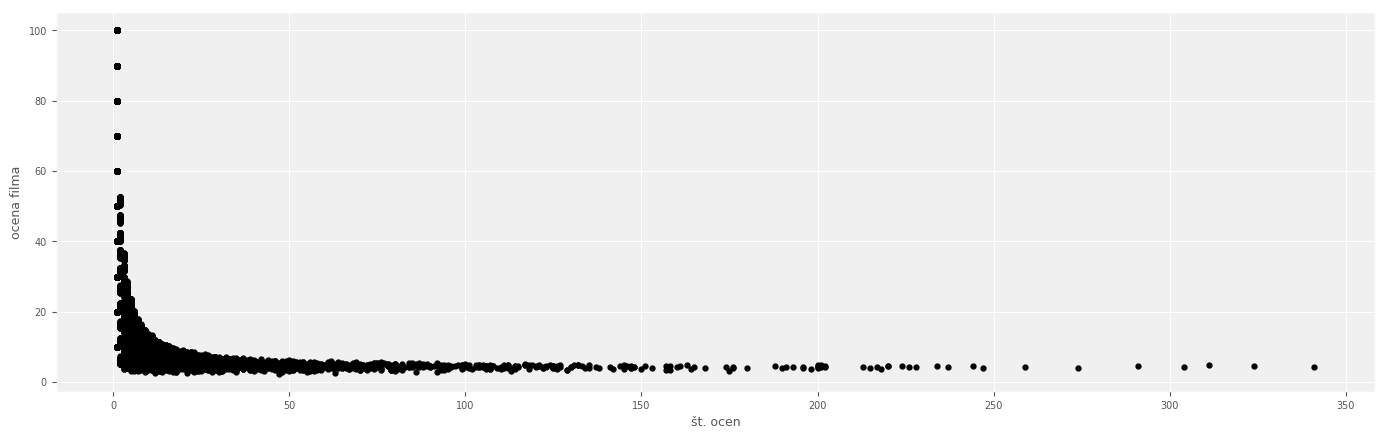

In [308]:
plt.figure(figsize = (17,5))
x = sumRatings.values()
y = ratingCount.values()
plt.plot(y,x,"k.")
plt.xlabel('št. ocen')
plt.ylabel('ocena filma');

Odgovor: Je dosti več negativnih ocen za posamezen filem kot pa je za zelo dobro ocenjen filem, kar pomeni da dobri filmi so bili manj gledani kot pa slabi filmi.

### 4. vprašanje (30%):
Vsaka ocena je bila vnešena na določen datum (stolpec
*timestamp*).  Ali se popularnost posameznih filmov s časom spreminja?
Problem reši tako, da za dani film ocene razporediš po času ter v vsaku časovni
točki izračunaš povprečje za zadnjih 30, 50, ali 100 ocen. Nariši graf, kako se
ocena spreminja in ga prikaži za dva zanimiva primera filmov.

In [6]:
# kodo lahko razdelite v več celic

Odgovor: **zapišite odgovor**

### 5. vprašanje (20%):
Kako bi ocenili popularnost posameznih igralcev? Opišite postopek
ocenitve ter izpišite 10 najbolj popularnih igralcev.

In [294]:
actorRoles = {}
actorMoviesRatings = {}
sortedRatings = sumRatings
finalActors = {}
readerCast = csv.DictReader(open('cast.csv', 'rt', encoding='utf-8'))
for row in readerCast:
    movieC = row["movieId"]
    castC = row["cast"]
    actores = castC.split("|")
    for actor in actores:
        if actor not in actorRoles:
            actorRoles.update({actor:1})
        else:
            actorRoles[actor] += 1
        if actor not in actorMoviesRatings:
            actorMoviesRatings.update({actor:sortedRatings.get(movieC,0)})
        else:
            actorMoviesRatings[actor] += sortedRatings.get(movieC, 0)
for key in actorMoviesRatings:
    if key not in finalActors:
        finalActors.update({key:actorMoviesRatings.get(key)/actorRoles.get(key)})
sortedX = sorted(finalActors.items(),key=operator.itemgetter(1))
count = 0
while count < 10:
    print(sortedX.pop())
    count += 1

('Jon Savage', 100.0)
('Howard Goodall', 100.0)
('Kitty Oliver', 100.0)
('Richard Lester', 100.0)
('Neil Aspinall', 100.0)
('Larry Kane', 100.0)
('Usha Nadkarni', 100.0)
('Sachin Khedekar', 100.0)
('Kanwaljit Singh', 100.0)
('Ty Hurley', 100.0)


Odgovor: No, vsak igralec je tolko dober kot filem v katerem je igral, zato bi za vsakega igralca vzel povprečno oceno filmov, v katerih je igral in pol to delil z vsemi filmi, v katerih je igral in bi tako dobil njegovo popularnost recimo.

### bonus vprašanje (5%):

Kateri je tvoj najljubši film? Zakaj?

Odgovor: Scott Pilgrim vs. the World. Všeč mi pa je ker je zelo lepa ljubezenska zgodba vendar prikazana na zelo
zanimiv in unikaten način. Vsebina je iz že obstoječega stripa in zelo lepo prikaže vse like in teme.

## Zapiski
Za nalaganje podatkov lahko uporabite vgrajen modul `csv`. Mapa s podatki `ml-latest-small` se v tem primeru mora nahajati v isti mapi kot notebook.

In [225]:
from csv import DictReader

reader = DictReader(open('ratings.csv', 'rt', encoding='utf-8'))
for row in reader:
    user = row["userId"]
    movie = row["movieId"]
    rating = row["rating"]
    timestamp = row["timestamp"]

Podatki v zadnji vrstici datoteke:

In [226]:
user, movie, rating, timestamp

('671', '6565', '3.5', '1074784724')

Pretvorba časovnega formata (*Unix time*). Kode za oblikovanje so navedene v dokumentaciji modula [`datetime`](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

In [227]:
from datetime import datetime

t = 1217897793 # Unix-time
ts = datetime.fromtimestamp(t).strftime('%Y-%m-%d %H:%M')
ts

'2008-08-05 02:56'